## Transformada de Hough

In [1]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#### Imprimimos la imágen en RGB y en gris

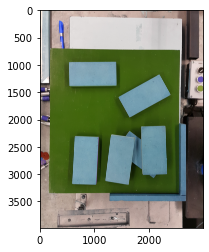

In [2]:
img = cv.imread('bloques1.jpg')
plt.imshow(img)
plt.show()

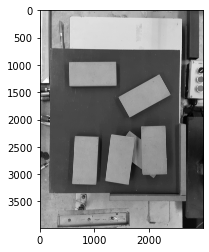

In [3]:
grayImg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(grayImg, cmap='gray')
plt.show()

#### Probamos la transformada de Hough (líneas) sobre la imágen gris sin hacer ninguna modificación

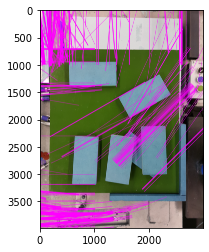

In [4]:
# Obtenemos los bordes por Canny
#===============================
edges = cv.Canny(grayImg,150,160,apertureSize = 3)

# Obtenemos las líneas por la transformada de Hough
#==================================================
rho_step = 1
theta_step = (np.pi/180)*5
thresh = 60
lines = cv.HoughLines(edges,rho_step,theta_step,thresh)

# Dibujamos lo resultados
#========================
imgCopy = img.copy()
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(imgCopy,(x1,y1),(x2,y2),(255,0,255),3)

    
plt.imshow(imgCopy, cmap='gray')
plt.show()

#### Se puede ver que el resultado no es el buscado, por lo que vamos a realizar procesamientos sobre la imágen

####  Recortamos la imágen para obtener solo los bloques y no todo el fondo innecesario

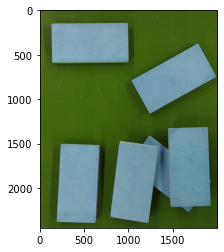

In [5]:
cutoutImg = img[800:3250,400:2400]
plt.imshow(cutoutImg)
plt.show()

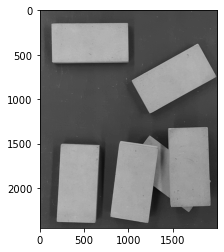

In [6]:
grayCutoutImg = cv.cvtColor(cutoutImg, cv.COLOR_BGR2GRAY)
plt.imshow(grayCutoutImg, cmap="gray")
plt.show()

#### Binarizamos la imágen

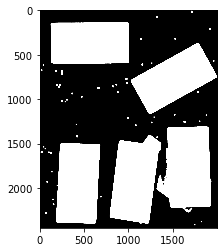

In [7]:
ret, binarizedImg = cv.threshold(grayCutoutImg,120,255,cv.THRESH_BINARY)
plt.imshow(binarizedImg,cmap='gray', vmin=0, vmax=1)
plt.show()

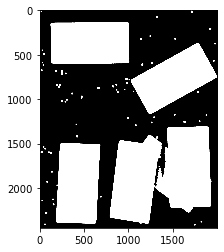

In [8]:
ret, binarizedImg = cv.threshold(grayCutoutImg,120,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(binarizedImg,cmap='gray', vmin=0, vmax=1)
plt.show()

#### La binarización por Otsu es un poquito mejor, entonces usamos esa

#### Vemos de hacer la transformada nuevamente sobre esta imágen

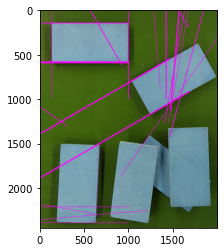

In [9]:
# Obtenemos los bordes por Canny
#===============================
edges = cv.Canny(binarizedImg,150,160,apertureSize = 3)

# Obtenemos las líneas por la transformada de Hough
#==================================================
rho_step = 1
theta_step = (np.pi/180)*5
thresh = 60
lines = cv.HoughLines(edges,rho_step,theta_step,thresh)

# Dibujamos lo resultados
#========================
imgCopy = cutoutImg.copy()
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(imgCopy,(x1,y1),(x2,y2),(255,0,255),3)

    
plt.imshow(imgCopy, cmap='gray')
plt.show()

#### Seguimos sin obtener el resultado esperado

#### Hacemos una máscara por color para ver si obtenemos mejores resultados

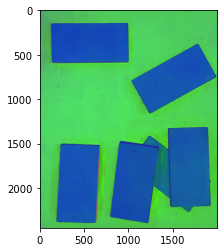

In [10]:
hsv_image = cv.cvtColor(cutoutImg, cv.COLOR_BGR2HSV)
plt.imshow(hsv_image)
plt.show()

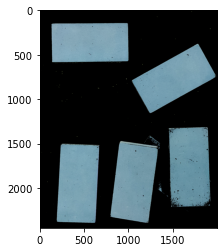

In [13]:
lower_blue = np.array([0,0,150])
upper_blue = np.array([180,255,255])

mask = cv.inRange(hsv_image,lower_blue, upper_blue)
result = cv.bitwise_and(cutoutImg,cutoutImg,mask = mask)

plt.imshow(result)
plt.show()

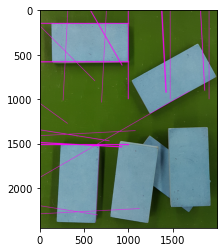

In [14]:
# Obtenemos los bordes por Canny
#===============================
edges = cv.Canny(result,150,160,apertureSize = 3)

# Obtenemos las líneas por la transformada de Hough
#==================================================
rho_step = 1
theta_step = (np.pi/180)*3
thresh = 100
lines = cv.HoughLines(edges,rho_step,theta_step,thresh)

# Dibujamos lo resultados
#========================
imgCopy = cutoutImg.copy()
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(imgCopy,(x1,y1),(x2,y2),(255,0,255),3)

    
plt.imshow(imgCopy)
plt.show()

#### Los resultados parecen mejorar pero no como esperamos, vamos a intentar modificar los parámetros de Hough 

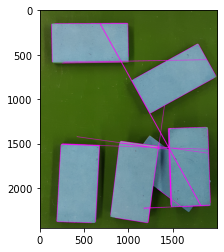

In [15]:
# Obtenemos los bordes por Canny
#===============================
edges = cv.Canny(result,150,160,apertureSize = 3)

# Obtenemos las líneas por la transformada de Hough
#==================================================
rho_step = 1
theta_step = (np.pi/180) * 1
thresh = 100
lines = cv.HoughLinesP(edges,rho_step,theta_step,thresh, None, 150, 500)

# Dibujamos lo resultados
#========================
imgCopy = cutoutImg.copy()
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv.line(imgCopy,(x1,y1),(x2,y2),(255,0,255),3)
    
plt.imshow(imgCopy)
plt.show()

#### Modificando los valores pudimos obtener un mejor resultado y se ve como quedan marcadas las líneas principales que definen a los bloques